# 스타트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 도로형태별

In [2]:
kind = pd.read_csv('./도로형태별_20102019.csv')
kind

,교통사고지표 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,도로형태,발생건수,대형사고,중대사고,NaN,사망자수,치사율(%)
1,NaN,NaN,NaN,여객(건),화물(건),NaN,NaN
2,교차로안,"630,425",118,135,"4,608","8,349",1.32
3,교차로부근,"372,310",84,60,"2,285","5,283",1.42
4,횡단보도상,"53,008",1,4,586,"1,568",2.96
5,횡단보도부근,"18,658",7,3,72,492,2.64
6,터널,"6,806",13,14,97,280,4.11
7,교량,"15,606",21,12,168,710,4.55
8,철길건널목,58,0,0,2,21,36.21
9,기타(단일로),"1,034,369",488,446,"7,760","27,688",2.68


In [3]:
kind.iloc[0, 4] = kind.iloc[0, 3]
kind.iloc[0, 3] += kind.iloc[1, 3]
kind.iloc[0, 4] += kind.iloc[1, 4]
kind.columns = kind.loc[0]
kind.drop([0, 1], inplace=True)
kind.index = kind.iloc[:, 0]
kind.drop('도로형태', axis=1, inplace=True)
for i in kind.columns[:-1]:
    kind[i] = kind[i].str.replace(',','').astype('int')
kind

,발생건수,대형사고,중대사고여객(건),중대사고화물(건),사망자수,치사율(%)
도로형태,,,,,,
교차로안,630425,118,135,4608,8349,1.32
교차로부근,372310,84,60,2285,5283,1.42
횡단보도상,53008,1,4,586,1568,2.96
횡단보도부근,18658,7,3,72,492,2.64
터널,6806,13,14,97,280,4.11
교량,15606,21,12,168,710,4.55
철길건널목,58,0,0,2,21,36.21
기타(단일로),1034369,488,446,7760,27688,2.68
고가도로위,1284,0,1,17,31,2.41


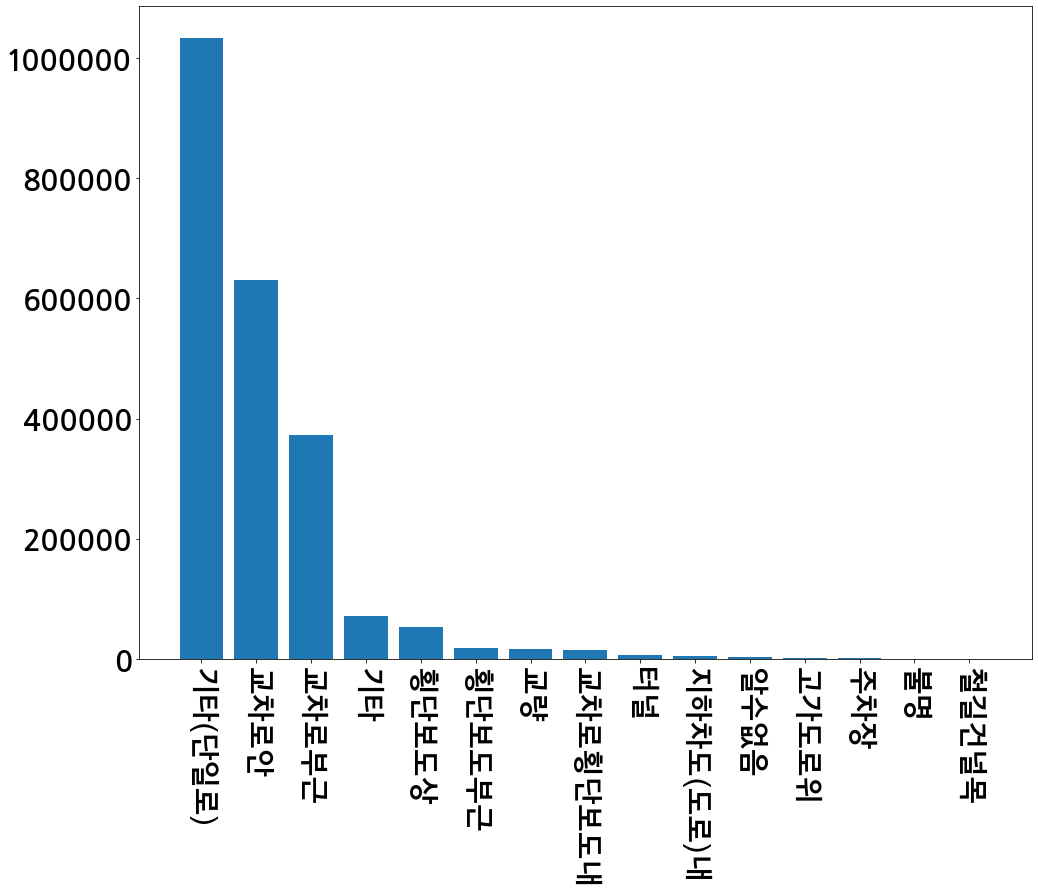

In [4]:
kind.sort_values(by='발생건수', ascending=False, inplace=True)
kinds = kind.index[1:]
cases = kind['발생건수'][1:]

plt.figure(figsize=(16, 12))
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.bar(kinds, cases)
plt.xticks(rotation=-90, fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('doro_bar.png')
plt.show()

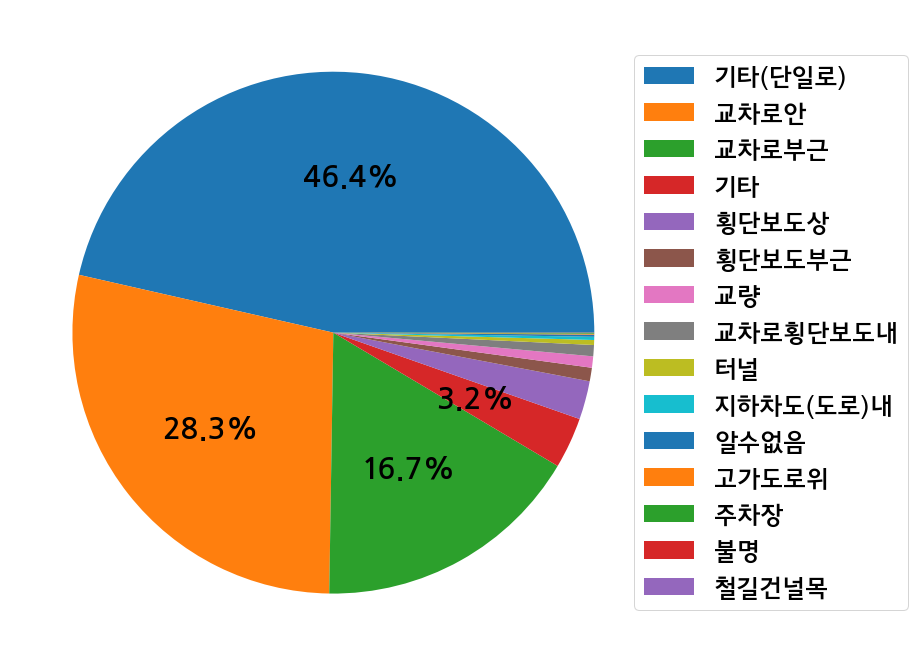

In [5]:
data = cases
plt.figure(figsize=(16, 12))
plt.pie(cases, autopct=lambda pct: '%.1f%%' % pct if pct > 3 else '', textprops={'fontsize': 30})
plt.legend(kinds, loc='center right', bbox_to_anchor=(1.4, .5), fontsize=25)
plt.savefig('doro_pie.png')
plt.show()

# 사고유형별

In [6]:
kind = pd.read_csv('./사고유형별_20102019.csv')
kind

,교통사고지표 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,사고유형,발생건수,대형사고,중대사고,NaN,사망자수,치사율(%)
1,NaN,NaN,NaN,여객(건),화물(건),NaN,NaN
2,횡단중,"215,007",2,15,"2,247","9,515",4.43
3,차도통행중,"39,609",0,1,250,"1,805",4.56
4,길가장자리구역통행중,"33,506",6,2,181,882,2.63
5,보도통행중,"22,176",0,2,212,518,2.34
6,차대사람-기타,"175,907",6,12,"1,027","4,788",2.72
7,정면충돌,"153,705",80,67,"1,687","3,567",2.32
8,측면직각충돌,"685,391",163,142,"4,605","6,472",0.94
9,추돌(진행중),"281,574",199,149,"2,589","3,576",1.27


In [7]:
kind.iloc[0, 4] = kind.iloc[0, 3]
kind.iloc[0, 3] += kind.iloc[1, 3]
kind.iloc[0, 4] += kind.iloc[1, 4]
kind.columns = kind.loc[0]
kind.drop([0, 1], inplace=True)
kind.index = kind.iloc[:, 0]
kind.drop('사고유형', axis=1, inplace=True)
for i in kind.columns[:-1]:
    kind[i] = kind[i].str.replace(',','').astype('int')
kind

,발생건수,대형사고,중대사고여객(건),중대사고화물(건),사망자수,치사율(%)
사고유형,,,,,,
횡단중,215007,2,15,2247,9515,4.43
차도통행중,39609,0,1,250,1805,4.56
길가장자리구역통행중,33506,6,2,181,882,2.63
보도통행중,22176,0,2,212,518,2.34
차대사람-기타,175907,6,12,1027,4788,2.72
정면충돌,153705,80,67,1687,3567,2.32
측면직각충돌,685391,163,142,4605,6472,0.94
추돌(진행중),281574,199,149,2589,3576,1.27
추돌(주정차중),137906,93,69,685,1465,1.06


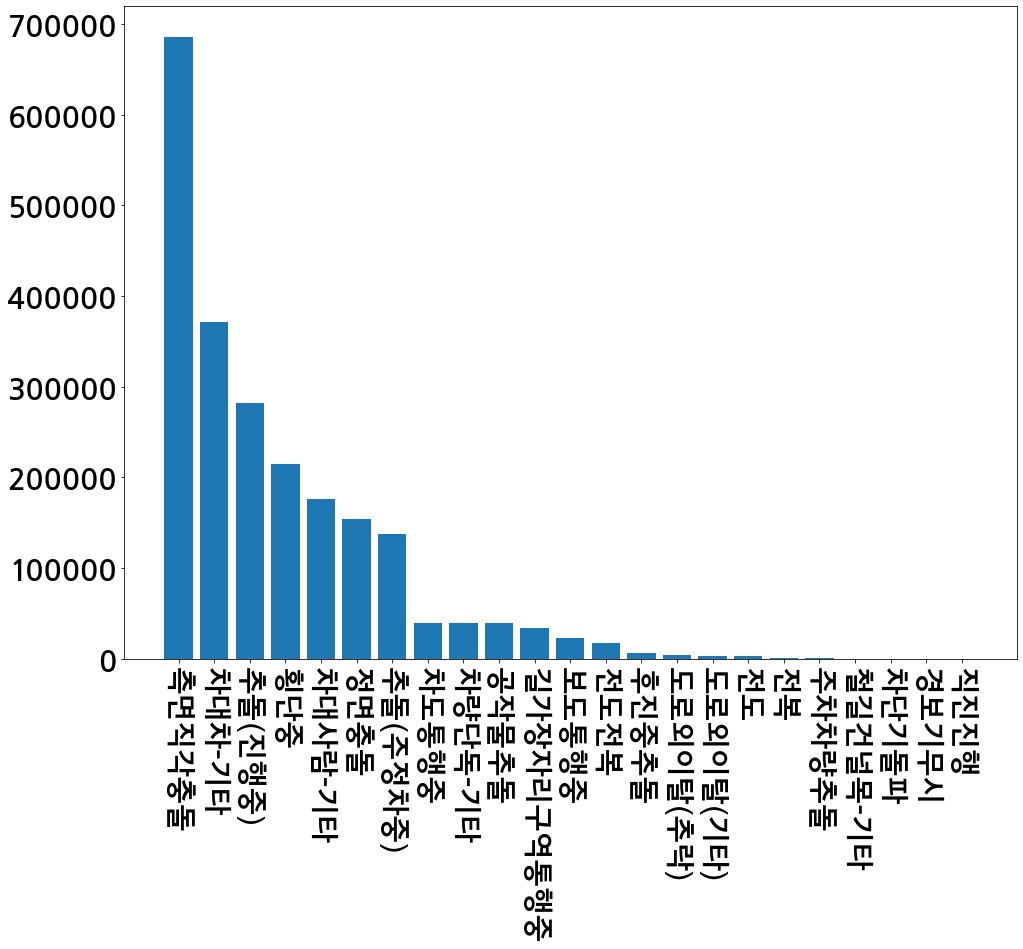

In [8]:
kind.sort_values(by='발생건수', ascending=False, inplace=True)
kinds = kind.index[1:]
cases = kind['발생건수'][1:]

plt.figure(figsize=(16, 12))
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.bar(kinds, cases)
plt.xticks(rotation=-90, fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('sago_bar.png')
plt.show()

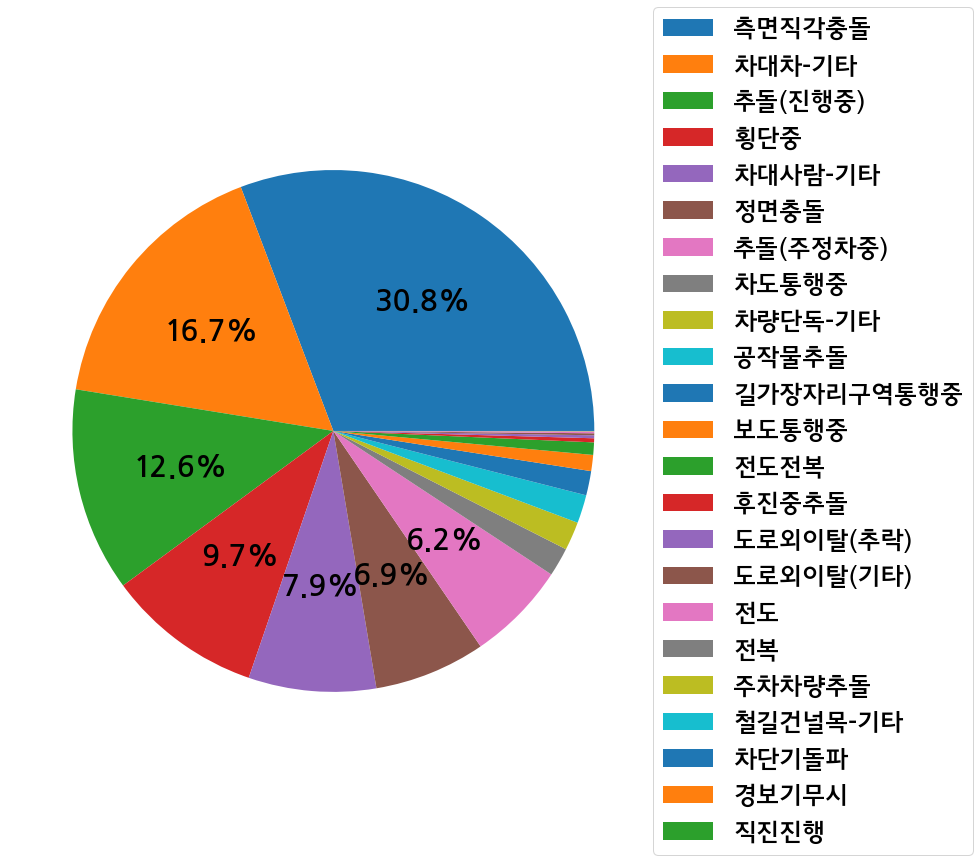

In [9]:
data = cases
plt.figure(figsize=(16, 12))
plt.pie(cases, autopct=lambda pct: '%.1f%%' % pct if pct > 3 else '', textprops={'fontsize': 30})
plt.legend(kinds, loc='center right', bbox_to_anchor=(1.5, .5), fontsize=25)
plt.savefig('sago_pie.png')
plt.show()

# 위반유형별

In [10]:
kind = pd.read_csv('./위반유형별_20102019.csv')
kind

,교통사고지표 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,위반유형,발생건수,대형사고,중대사고,NaN,사망자수,치사율(%)
1,NaN,NaN,NaN,여객(건),화물(건),NaN,NaN
2,중앙선침범,"116,233",83,70,"1,330","3,902",3.36
3,신호위반,"253,823",81,83,"3,108","3,552",1.40
4,안전거리미확보,"213,847",104,47,"1,340",797,0.37
5,불법유턴,"14,752",3,1,214,238,1.61
6,과속,"6,294",29,51,81,"1,721",27.34
7,안전운전불이행,"1,246,022",427,408,"7,800","32,292",2.59
8,교차로운행방법위반,"147,785",12,8,523,818,0.55
9,보행자보호의무위반,"73,365",0,4,"1,105","1,623",2.21


In [11]:
kind.iloc[0, 4] = kind.iloc[0, 3]
kind.iloc[0, 3] += kind.iloc[1, 3]
kind.iloc[0, 4] += kind.iloc[1, 4]
kind.columns = kind.loc[0]
kind.drop([0, 1], inplace=True)
kind.index = kind.iloc[:, 0]
kind.drop('위반유형', axis=1, inplace=True)
for i in kind.columns[:-1]:
    kind[i] = kind[i].str.replace(',','').astype('int')
kind

,발생건수,대형사고,중대사고여객(건),중대사고화물(건),사망자수,치사율(%)
위반유형,,,,,,
중앙선침범,116233,83,70,1330,3902,3.36
신호위반,253823,81,83,3108,3552,1.40
안전거리미확보,213847,104,47,1340,797,0.37
불법유턴,14752,3,1,214,238,1.61
과속,6294,29,51,81,1721,27.34
안전운전불이행,1246022,427,408,7800,32292,2.59
교차로운행방법위반,147785,12,8,523,818,0.55
보행자보호의무위반,73365,0,4,1105,1623,2.21
차로위반,34469,6,3,202,174,0.50


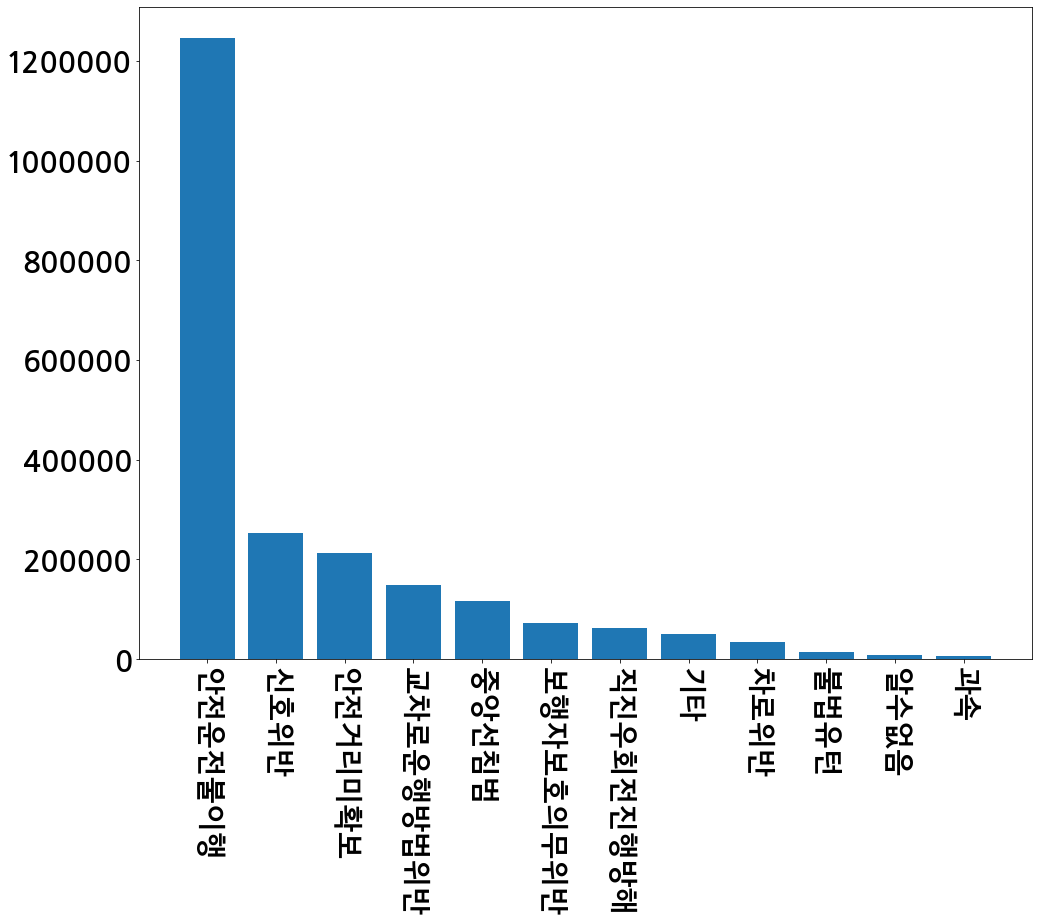

In [12]:
kind.sort_values(by='발생건수', ascending=False, inplace=True)
kinds = kind.index[1:]
cases = kind['발생건수'][1:]

plt.figure(figsize=(16, 12))
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.bar(kinds, cases)
plt.xticks(rotation=-90, fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('wrong_bar.png')
plt.show()

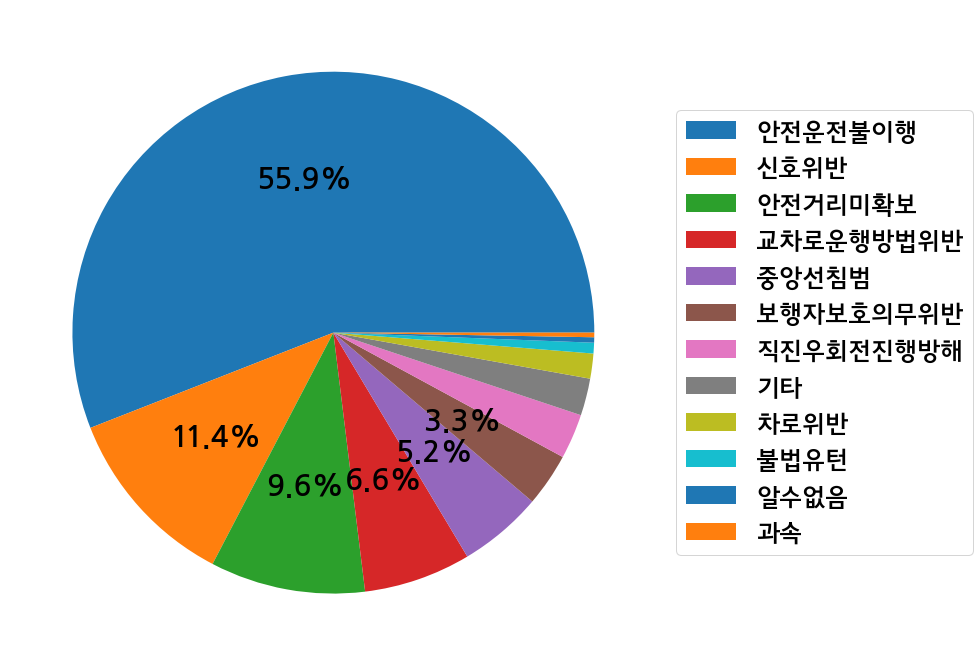

In [13]:
data = cases
plt.figure(figsize=(16, 12))
plt.pie(cases, autopct=lambda pct: '%.1f%%' % pct if pct > 3 else '', textprops={'fontsize': 30})
plt.legend(kinds, loc='center right', bbox_to_anchor=(1.5, .5), fontsize=25)
plt.savefig('wrong_pie.png')
plt.show()

# 기상상태별

In [14]:
kind = pd.read_csv('./기상상태별_20102019.csv')
kind

,교통사고지표 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,기상상태,발생건수,대형사고,중대사고,NaN,사망자수,치사율(%)
1,NaN,NaN,NaN,여객(건),화물(건),NaN,NaN
2,맑음,"1,922,833",603,519,"14,029","37,298",1.94
3,흐림,"95,444",49,55,718,"3,472",3.64
4,비,"173,140",81,93,"1,288","4,431",2.56
5,안개,"3,492",13,6,79,318,9.11
6,눈,"18,178",14,21,113,442,2.43
7,기타,"12,835",1,0,50,225,1.75
8,알수없음,"1,263",0,0,15,22,1.74
9,합계,"2,227,186",761,694,"16,292","46,208",NaN


In [15]:
kind.iloc[0, 4] = kind.iloc[0, 3]
kind.iloc[0, 3] += kind.iloc[1, 3]
kind.iloc[0, 4] += kind.iloc[1, 4]
kind.columns = kind.loc[0]
kind.drop([0, 1], inplace=True)
kind.index = kind.iloc[:, 0]
kind.drop('기상상태', axis=1, inplace=True)
for i in kind.columns[:-1]:
    kind[i] = kind[i].str.replace(',','').astype('int')
kind

,발생건수,대형사고,중대사고여객(건),중대사고화물(건),사망자수,치사율(%)
기상상태,,,,,,
맑음,1922833,603,519,14029,37298,1.94
흐림,95444,49,55,718,3472,3.64
비,173140,81,93,1288,4431,2.56
안개,3492,13,6,79,318,9.11
눈,18178,14,21,113,442,2.43
기타,12835,1,0,50,225,1.75
알수없음,1263,0,0,15,22,1.74
합계,2227186,761,694,16292,46208,NaN


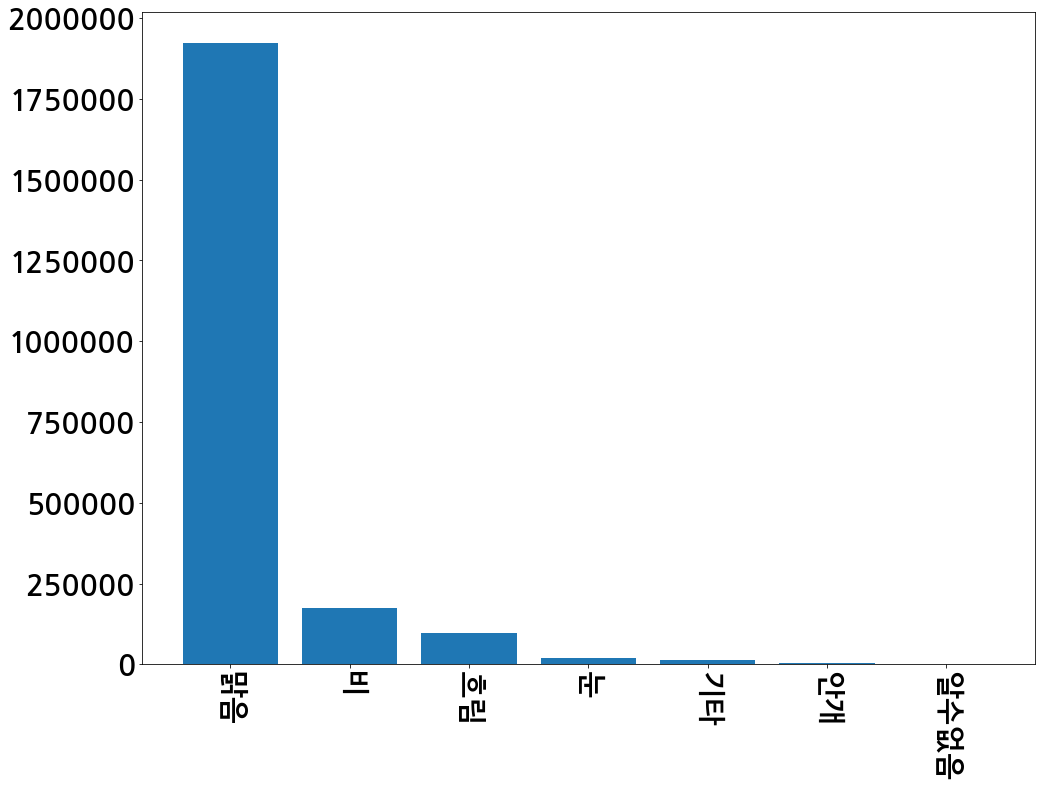

In [16]:
kind.sort_values(by='발생건수', ascending=False, inplace=True)
kinds = kind.index[1:]
cases = kind['발생건수'][1:]

plt.figure(figsize=(16, 12))
ax = plt.gca()
ax.ticklabel_format(style='plain')
plt.bar(kinds, cases)
plt.xticks(rotation=-90, fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('weather_bar.png')
plt.show()

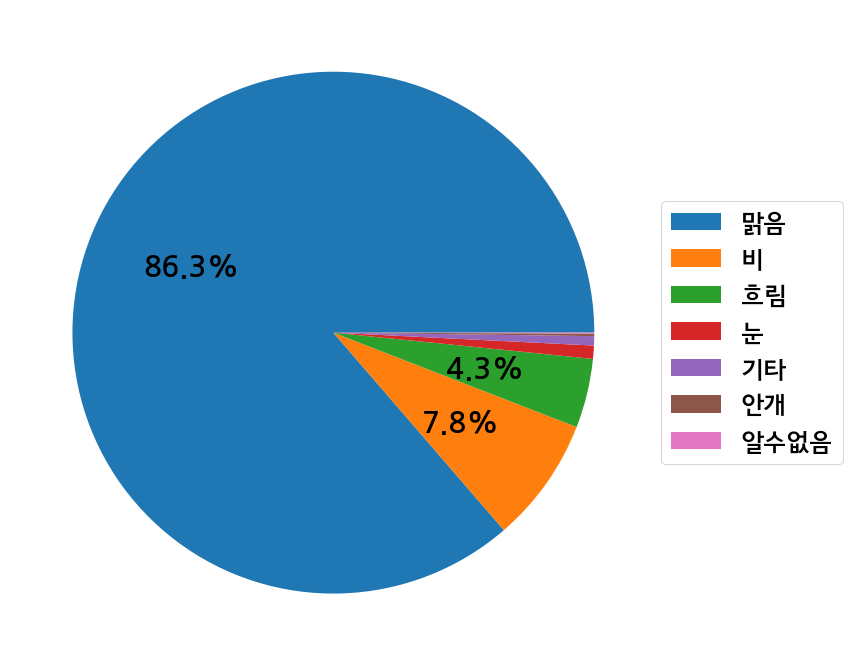

In [17]:
data = cases
plt.figure(figsize=(16, 12))
plt.pie(cases, autopct=lambda pct: '%.1f%%' % pct if pct > 3 else '', textprops={'fontsize': 30})
plt.legend(kinds, loc='center right', bbox_to_anchor=(1.3, .5), fontsize=25)
plt.savefig('weather_pie.png')
plt.show()